In [1]:
from pathlib import Path
import sys
sys.path.append('../../')

from skimage import io, measure
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams["font.family"] = "Times New Roman"
from matplotlib import cm
import numpy as np

from array_wise_eval import plain_post_proc # Handles size and confidence thresholding

In [2]:
MIN_SIZE = 10
MIN_CONF = 128

### Read RGB, ground truth label and sample predicted confidence map for sample tile "180695_ne"

In [6]:
rgb = io.imread('../dilation_based_grouping/180695_ne.jpg') # Load RGB image
label = io.imread('../dilation_based_grouping/180695_ne.png') # Load ground truth label
conf = io.imread('180695_ne_conf.png') # Load confidence map

In [5]:
pred = plain_post_proc(conf, MIN_CONF, MIN_SIZE) # Get thresholded prediction from confidence map

### Make pixel-wise label example with custom color bar

Use 4 distinct color to visualize true negatives (TN), true positives (TP), false negatives (FN), and false positives (FP).

In [7]:
types = ['TN', 'TP', 'FN', 'FP']
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
colors = ['black', 'limegreen', 'tab:orange', 'tab:red'] # TN, TP, FN, FP
cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

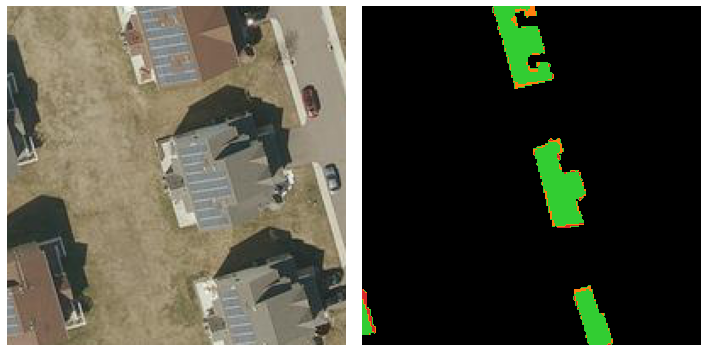

In [11]:
intersection = np.multiply(pred, label) # Assign numeric value 1 to true positive pixels
diff = pred - label # Find differences between prediction and ground truth label
fp = diff == 1 # 
fn = diff == -1

results_map = np.sum([intersection, fn*2, fp*3], axis=0)
# Above lines make all TP pixels equal to 1, all FNs as 2, all FPs as 3. Remaining pixels are TNs and are all zeros.

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(rgb[1500:1700, 1500:1700])
ax[0].axis('off')

ax[1].imshow(results_map[1500:1700, 1500:1700], cmap=cmap, norm=norm)
ax[1].axis('off')

plt.tight_layout()
plt.show()